In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import os
import ujson
import attr

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [4]:
ds = Dataset('../../data/punct.json/')

In [5]:
novel = next(ds.novels())

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [6]:
tokens = list(novel['counts'].keys())

In [7]:
tokens

['!', '"']

In [8]:
def plot_dirs(token):
    
    counts = [
        np.array(novel['counts'][token])
        for novel in ds.novels()
        if sum(novel['counts'][token])
    ]

    dirs = OrderedDict([
        ('down down', sum([1 for c in counts if c[0] > c[1] and c[1] > c[2]]) / len(counts)),
        ('up up', sum([1 for c in counts if c[0] < c[1] and c[1] < c[2]]) / len(counts)),
        ('down up', sum([1 for c in counts if c[0] > c[1] and c[1] < c[2]]) / len(counts)),
        ('up down', sum([1 for c in counts if c[0] < c[1] and c[1] > c[2]]) / len(counts)),
    ])

    plt.figure(figsize=(8,8))

    sns.barplot(
        x=list(dirs.keys()),
        y=list(dirs.values()),
    )

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

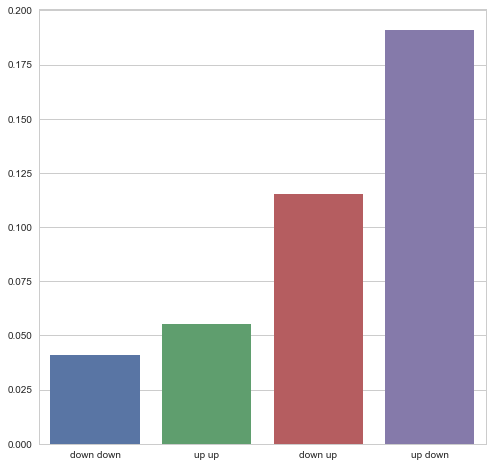

In [11]:
plot_dirs('"')